# 인공지능과 가위바위보 하기[프로젝트]

## 라이브러리 버전 확인

In [ ]:
# 라이브러리 버전 확인
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.17.1
1.26.4


## 데이터 준비

### 웹캠을 이용하여 가위바위보 데이터 만들기
---
https://teachablemachine.withgoogle.com/

- 여러각도에서 찍기
- 여러 크기로 찍기
- 옆 동료에게 도움 받아서 찍기

#### 디렉토리 만들기
```
# 디렉토리 만들기
$ mkdir -p ~/rock_scissor_paper/scissor
$ mkdir -p ~/rock_scissor_paper/rock
$ mkdir -p ~/rock_scissor_paper/paper

$ ls -l ~/aiffel/rock_scissor_paper
```

> **토막 리눅스 사용법 **   
`mkdir -p` : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.

### 데이터 불러오기 + Resize 하기
- 가위바위보 이미지를 불러와 28*28크기로 만들기. 이를 위해 PIL 라이브러리 사용

In [ ]:
# PIL라이브러리 불러오기
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [ ]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 수정
import os
print('os.getcwd():',os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/08_Deep_Learning/rock_scissors_paper')
print('os.getcwd():',os.getcwd())

Mounted at /content/drive
os.getcwd(): /content
os.getcwd(): /content/drive/MyDrive/Colab Notebooks/08_Deep_Learning/rock_scissors_paper


In [ ]:
# 이미지의 사이즈를 변경하는 함수 정의
def resize_images(img_path):
  images = glob.glob(img_path + "/*.jpg")

  print(len(images), "image to be resized")

  target_size = (28, 28)

  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
    # new_img = old_img.resize(target_size, Image.ANTIALIAS)  사라진 코드
    new_img.save(img, "JPEG")

  print(len(images), " images resized")

- 참고: `ANTIALIAS` was removed in Pillow 10.0.0 (after being deprecated through many previous versions). Now you need to use `PIL.Image.LANCZOS` or `PIL.Image.Resampling.LANCZOS`.

In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getcwd() + '/scissors'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

120 image to be resized
120  images resized
가위 이미지 resize 완료!


In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getcwd() + '/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

120 image to be resized
120  images resized
바위 이미지 resize 완료!


In [ ]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path =  os.getcwd() + '/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

120 image to be resized
120  images resized
보 이미지 resize 완료!


## 가위바위보 라벨링

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=360):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getcwd()
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 360 입니다.
x_train shape: (360, 28, 28, 3)
y_train shape: (360,)


라벨:  0


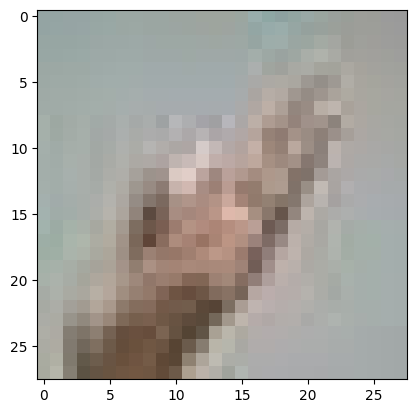

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델학습
---
- `load_data()`라는 함수를 만들어 가위바위보 데이터를 읽을 수 있게 함
- `가위:0, 바위:1, 보:2`로 라벨링

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1 = 16
n_channel_2 = 32
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,003 (421.89 KB)

 Trainable params: 108,003 (421.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델훈련
model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=32)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3271 - loss: 66.0060
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3561 - loss: 12.2985
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5201 - loss: 3.9974
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5664 - loss: 1.4801
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7390 - loss: 0.8287
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8217 - loss: 0.5111
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8522 - loss: 0.3496
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9261 - loss: 0.2456
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9293 - loss: 0.1790
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9593 - loss: 0.1507
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9686 - loss: 0.1178
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accurac

## 모델 성능평가

In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getcwd() + "/test/scissors"
resize_images(image_dir_path)

image_dir_path = os.getcwd() + "/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getcwd() + "/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getcwd() + "/test"
(x_test, y_test) = load_data(image_dir_path, 240)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

80 image to be resized
80  images resized
80 image to be resized
80  images resized
80 image to be resized
80  images resized
학습데이터(x_train)의 이미지 개수는 240 입니다.
x_test shape: (240, 28, 28, 3)
y_test shape: (240,)


In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

8/8 - 0s - 10ms/step - accuracy: 0.9083 - loss: 0.3239
test_loss: 0.3238752782344818
test_accuracy: 0.9083333611488342
